In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Overview
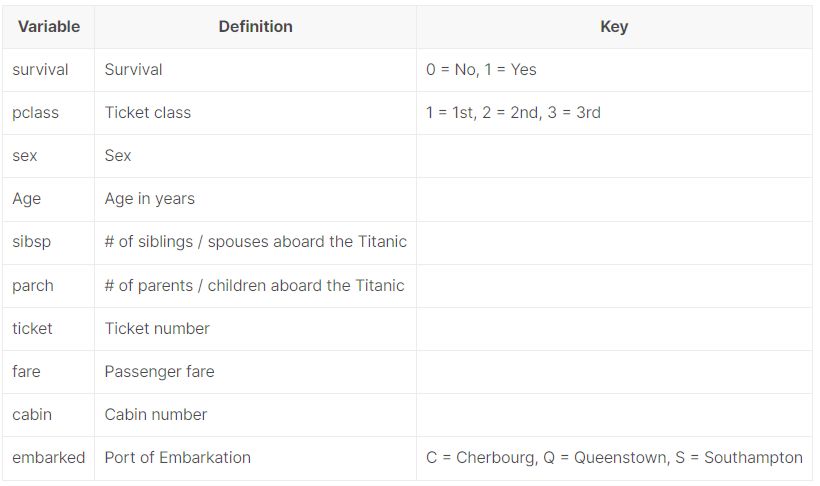

Variable Notes
pclass: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

*** age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5 ***

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [5]:
df=pd.read_csv('data/train.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
columns=df.columns

In [11]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [12]:
for col in columns:
    if df[col].nunique()<500:
        print(col+":"+str(df[col].unique()))
        print("-"*100)

Survived:[0 1]
----------------------------------------------------------------------------------------------------
Pclass:[3 1 2]
----------------------------------------------------------------------------------------------------
Sex:['male' 'female']
----------------------------------------------------------------------------------------------------
Age:[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
----------------------------------------------------------------------------------------------------
SibSp:[1 0 

In [203]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
si1=SimpleImputer(missing_values=np.nan,strategy='mean')

In [204]:
df["Age"]=si.fit_transform(df.iloc[:,5:6])

In [205]:
si2=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df["Embarked"]=si.fit_transform(df.iloc[:,-1].values.reshape(-1,1))

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [17]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
rem=[]
for i in columns:
    if(df[i].nunique()>20 and i!="Age"):
        rem.append(i)

In [19]:
df=df.drop(rem,axis=1)

In [20]:
cat=[]
for col in df.columns:
    if(df[col].dtype == 'object'):
        cat.append(col)

In [21]:
ohe=OneHotEncoder()

In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [23]:
df1=pd.DataFrame(ohe.fit_transform(df[cat]).toarray(),columns=["f","m","c","q","s"])

In [24]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [25]:
df=df.join(df1)

In [26]:
df.drop(['Sex',"Embarked",'f'],inplace=True,axis=1)

In [27]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,m,c,q,s
0,0,3,22.0,1,0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,1.0,0.0,0.0,1.0


In [28]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=40)

In [30]:
print("Shape of xtrain : ",xtrain.shape)
print("shape of xtest : ",xtest.shape)
print("shape of ytrain : ",ytrain.shape)
print("shape of ytest : ",ytest.shape)

Shape of xtrain :  (623, 8)
shape of xtest :  (268, 8)
shape of ytrain :  (623,)
shape of ytest :  (268,)


In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [32]:
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [34]:
lr=LogisticRegression(penalty='l2',max_iter=500)

In [35]:
lr.fit(xtrain,ytrain)

LogisticRegression(max_iter=500)

In [36]:
ypred=lr.predict(xtest)

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       156
           1       0.76      0.78      0.77       112

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [39]:
rf=RandomForestClassifier(n_estimators=2000)

In [40]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=2000)

In [41]:
ypred_rf=rf.predict(xtest)

In [42]:
print(classification_report(ytest,ypred_rf))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       156
           1       0.75      0.71      0.73       112

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [43]:
import catboost as cb

In [44]:
train_dataset=cb.Pool(xtrain,ytrain)
test_dataset=cb.Pool(xtest,ytest)

In [45]:
cbmodel=cb.CatBoostClassifier(loss_function='Logloss')

In [46]:
# grid search
grid = {'iterations' : [100,150,200,250],
        'learning_rate' : [0.03,0.1],
        'depth': [2,4,6,8]
       }

In [47]:
cbmodel.grid_search(grid,train_dataset)

0:	learn: 0.6778150	test: 0.6777584	best: 0.6777584 (0)	total: 169ms	remaining: 16.7s
1:	learn: 0.6655183	test: 0.6668100	best: 0.6668100 (1)	total: 171ms	remaining: 8.36s
2:	learn: 0.6519851	test: 0.6532002	best: 0.6532002 (2)	total: 172ms	remaining: 5.56s
3:	learn: 0.6421330	test: 0.6443073	best: 0.6443073 (3)	total: 173ms	remaining: 4.15s
4:	learn: 0.6325954	test: 0.6359432	best: 0.6359432 (4)	total: 174ms	remaining: 3.31s
5:	learn: 0.6216721	test: 0.6246866	best: 0.6246866 (5)	total: 175ms	remaining: 2.75s
6:	learn: 0.6127790	test: 0.6169203	best: 0.6169203 (6)	total: 176ms	remaining: 2.34s
7:	learn: 0.6055641	test: 0.6103600	best: 0.6103600 (7)	total: 177ms	remaining: 2.04s
8:	learn: 0.5959966	test: 0.6006174	best: 0.6006174 (8)	total: 178ms	remaining: 1.8s
9:	learn: 0.5871035	test: 0.5915471	best: 0.5915471 (9)	total: 180ms	remaining: 1.61s
10:	learn: 0.5807881	test: 0.5862208	best: 0.5862208 (10)	total: 181ms	remaining: 1.46s
11:	learn: 0.5742778	test: 0.5808992	best: 0.5808992 

57:	learn: 0.4186977	test: 0.4248974	best: 0.4248974 (57)	total: 58.7ms	remaining: 42.5ms
58:	learn: 0.4183894	test: 0.4239792	best: 0.4239792 (58)	total: 59.9ms	remaining: 41.7ms
59:	learn: 0.4182115	test: 0.4232344	best: 0.4232344 (59)	total: 61.1ms	remaining: 40.7ms
60:	learn: 0.4176625	test: 0.4233835	best: 0.4232344 (59)	total: 62.2ms	remaining: 39.8ms
61:	learn: 0.4174353	test: 0.4235509	best: 0.4232344 (59)	total: 63.3ms	remaining: 38.8ms
62:	learn: 0.4168678	test: 0.4226722	best: 0.4226722 (62)	total: 64.3ms	remaining: 37.8ms
63:	learn: 0.4164001	test: 0.4220028	best: 0.4220028 (63)	total: 65.4ms	remaining: 36.8ms
64:	learn: 0.4147300	test: 0.4222699	best: 0.4220028 (63)	total: 66.4ms	remaining: 35.8ms
65:	learn: 0.4144680	test: 0.4223913	best: 0.4220028 (63)	total: 67.4ms	remaining: 34.7ms
66:	learn: 0.4141907	test: 0.4216580	best: 0.4216580 (66)	total: 68.4ms	remaining: 33.7ms
67:	learn: 0.4137856	test: 0.4217654	best: 0.4216580 (66)	total: 69.5ms	remaining: 32.7ms
68:	learn:

119:	learn: 0.4363974	test: 0.4438261	best: 0.4434324 (115)	total: 122ms	remaining: 30.5ms
120:	learn: 0.4361757	test: 0.4433831	best: 0.4433831 (120)	total: 123ms	remaining: 29.5ms
121:	learn: 0.4357637	test: 0.4435560	best: 0.4433831 (120)	total: 124ms	remaining: 28.6ms
122:	learn: 0.4356408	test: 0.4432126	best: 0.4432126 (122)	total: 126ms	remaining: 27.6ms
123:	learn: 0.4355154	test: 0.4428458	best: 0.4428458 (123)	total: 127ms	remaining: 26.6ms
124:	learn: 0.4352265	test: 0.4423063	best: 0.4423063 (124)	total: 128ms	remaining: 25.6ms
125:	learn: 0.4350595	test: 0.4425153	best: 0.4423063 (124)	total: 129ms	remaining: 24.5ms
126:	learn: 0.4349015	test: 0.4420764	best: 0.4420764 (126)	total: 130ms	remaining: 23.5ms
127:	learn: 0.4348428	test: 0.4420749	best: 0.4420749 (127)	total: 131ms	remaining: 22.4ms
128:	learn: 0.4347279	test: 0.4419520	best: 0.4419520 (128)	total: 132ms	remaining: 21.4ms
129:	learn: 0.4345402	test: 0.4412244	best: 0.4412244 (129)	total: 133ms	remaining: 20.4ms

131:	learn: 0.3803266	test: 0.4310706	best: 0.4204877 (88)	total: 138ms	remaining: 18.8ms
132:	learn: 0.3800030	test: 0.4299777	best: 0.4204877 (88)	total: 139ms	remaining: 17.8ms
133:	learn: 0.3794110	test: 0.4288199	best: 0.4204877 (88)	total: 140ms	remaining: 16.8ms
134:	learn: 0.3790342	test: 0.4300282	best: 0.4204877 (88)	total: 142ms	remaining: 15.7ms
135:	learn: 0.3788413	test: 0.4307375	best: 0.4204877 (88)	total: 143ms	remaining: 14.7ms
136:	learn: 0.3784716	test: 0.4303854	best: 0.4204877 (88)	total: 144ms	remaining: 13.6ms
137:	learn: 0.3783093	test: 0.4298086	best: 0.4204877 (88)	total: 145ms	remaining: 12.6ms
138:	learn: 0.3778387	test: 0.4302104	best: 0.4204877 (88)	total: 146ms	remaining: 11.5ms
139:	learn: 0.3777198	test: 0.4308786	best: 0.4204877 (88)	total: 147ms	remaining: 10.5ms
140:	learn: 0.3775599	test: 0.4315313	best: 0.4204877 (88)	total: 148ms	remaining: 9.42ms
141:	learn: 0.3774555	test: 0.4319907	best: 0.4204877 (88)	total: 149ms	remaining: 8.37ms
142:	learn

147:	learn: 0.4310364	test: 0.4363377	best: 0.4363377 (147)	total: 151ms	remaining: 52.9ms
148:	learn: 0.4305743	test: 0.4361171	best: 0.4361171 (148)	total: 152ms	remaining: 52ms
149:	learn: 0.4302797	test: 0.4361296	best: 0.4361171 (148)	total: 154ms	remaining: 51.2ms
150:	learn: 0.4301584	test: 0.4359745	best: 0.4359745 (150)	total: 155ms	remaining: 50.2ms
151:	learn: 0.4300130	test: 0.4362361	best: 0.4359745 (150)	total: 156ms	remaining: 49.2ms
152:	learn: 0.4295011	test: 0.4358598	best: 0.4358598 (152)	total: 157ms	remaining: 48.1ms
153:	learn: 0.4294444	test: 0.4355357	best: 0.4355357 (153)	total: 158ms	remaining: 47.1ms
154:	learn: 0.4289679	test: 0.4351960	best: 0.4351960 (154)	total: 159ms	remaining: 46.1ms
155:	learn: 0.4289140	test: 0.4351124	best: 0.4351124 (155)	total: 160ms	remaining: 45ms
156:	learn: 0.4286898	test: 0.4353228	best: 0.4351124 (155)	total: 161ms	remaining: 44ms
157:	learn: 0.4284515	test: 0.4354382	best: 0.4351124 (155)	total: 162ms	remaining: 43ms
158:	le

119:	learn: 0.3847482	test: 0.4278396	best: 0.4204877 (88)	total: 119ms	remaining: 79.2ms
120:	learn: 0.3843628	test: 0.4266981	best: 0.4204877 (88)	total: 120ms	remaining: 78.5ms
121:	learn: 0.3838007	test: 0.4280270	best: 0.4204877 (88)	total: 121ms	remaining: 77.6ms
122:	learn: 0.3835552	test: 0.4281276	best: 0.4204877 (88)	total: 122ms	remaining: 76.7ms
123:	learn: 0.3834329	test: 0.4284913	best: 0.4204877 (88)	total: 124ms	remaining: 75.7ms
124:	learn: 0.3832765	test: 0.4289070	best: 0.4204877 (88)	total: 125ms	remaining: 74.7ms
125:	learn: 0.3830595	test: 0.4300463	best: 0.4204877 (88)	total: 126ms	remaining: 73.8ms
126:	learn: 0.3825201	test: 0.4296886	best: 0.4204877 (88)	total: 127ms	remaining: 72.8ms
127:	learn: 0.3823669	test: 0.4292131	best: 0.4204877 (88)	total: 128ms	remaining: 71.8ms
128:	learn: 0.3823194	test: 0.4291752	best: 0.4204877 (88)	total: 129ms	remaining: 70.9ms
129:	learn: 0.3812709	test: 0.4285125	best: 0.4204877 (88)	total: 130ms	remaining: 69.9ms
130:	learn

87:	learn: 0.4482175	test: 0.4545783	best: 0.4545783 (87)	total: 85.5ms	remaining: 157ms
88:	learn: 0.4479487	test: 0.4545061	best: 0.4545061 (88)	total: 86.5ms	remaining: 157ms
89:	learn: 0.4471421	test: 0.4536801	best: 0.4536801 (89)	total: 87.8ms	remaining: 156ms
90:	learn: 0.4466301	test: 0.4530708	best: 0.4530708 (90)	total: 88.8ms	remaining: 155ms
91:	learn: 0.4462632	test: 0.4532935	best: 0.4530708 (90)	total: 89.9ms	remaining: 154ms
92:	learn: 0.4459578	test: 0.4526444	best: 0.4526444 (92)	total: 90.9ms	remaining: 153ms
93:	learn: 0.4457660	test: 0.4527829	best: 0.4526444 (92)	total: 92ms	remaining: 153ms
94:	learn: 0.4456088	test: 0.4528504	best: 0.4526444 (92)	total: 93ms	remaining: 152ms
95:	learn: 0.4452472	test: 0.4521662	best: 0.4521662 (95)	total: 94.1ms	remaining: 151ms
96:	learn: 0.4446763	test: 0.4514464	best: 0.4514464 (96)	total: 95.1ms	remaining: 150ms
97:	learn: 0.4444967	test: 0.4514502	best: 0.4514464 (96)	total: 96ms	remaining: 149ms
98:	learn: 0.4442467	test: 

3:	learn: 0.5550748	test: 0.5580918	best: 0.5580918 (3)	total: 4.66ms	remaining: 286ms
4:	learn: 0.5377307	test: 0.5438032	best: 0.5438032 (4)	total: 6.17ms	remaining: 302ms
5:	learn: 0.5257131	test: 0.5344477	best: 0.5344477 (5)	total: 7.47ms	remaining: 304ms
6:	learn: 0.5154049	test: 0.5264689	best: 0.5264689 (6)	total: 8.56ms	remaining: 297ms
7:	learn: 0.5077014	test: 0.5209132	best: 0.5209132 (7)	total: 9.59ms	remaining: 290ms
8:	learn: 0.4973995	test: 0.5086374	best: 0.5086374 (8)	total: 10.6ms	remaining: 285ms
9:	learn: 0.4912621	test: 0.5054315	best: 0.5054315 (9)	total: 11.6ms	remaining: 279ms
10:	learn: 0.4884693	test: 0.5048640	best: 0.5048640 (10)	total: 12.6ms	remaining: 274ms
11:	learn: 0.4815010	test: 0.4968175	best: 0.4968175 (11)	total: 13.6ms	remaining: 270ms
12:	learn: 0.4769371	test: 0.4941795	best: 0.4941795 (12)	total: 14.5ms	remaining: 265ms
13:	learn: 0.4748005	test: 0.4899885	best: 0.4899885 (13)	total: 15.5ms	remaining: 261ms
14:	learn: 0.4725779	test: 0.484241

166:	learn: 0.3691022	test: 0.4352045	best: 0.4204877 (88)	total: 176ms	remaining: 87.7ms
167:	learn: 0.3687713	test: 0.4365849	best: 0.4204877 (88)	total: 178ms	remaining: 86.7ms
168:	learn: 0.3684356	test: 0.4361489	best: 0.4204877 (88)	total: 179ms	remaining: 85.7ms
169:	learn: 0.3683999	test: 0.4361312	best: 0.4204877 (88)	total: 180ms	remaining: 84.6ms
170:	learn: 0.3681717	test: 0.4364388	best: 0.4204877 (88)	total: 181ms	remaining: 83.5ms
171:	learn: 0.3678810	test: 0.4366057	best: 0.4204877 (88)	total: 182ms	remaining: 82.4ms
172:	learn: 0.3678475	test: 0.4369316	best: 0.4204877 (88)	total: 183ms	remaining: 81.3ms
173:	learn: 0.3675526	test: 0.4373628	best: 0.4204877 (88)	total: 184ms	remaining: 80.2ms
174:	learn: 0.3672656	test: 0.4372395	best: 0.4204877 (88)	total: 185ms	remaining: 79.1ms
175:	learn: 0.3669665	test: 0.4369803	best: 0.4204877 (88)	total: 186ms	remaining: 78ms
176:	learn: 0.3666415	test: 0.4368307	best: 0.4204877 (88)	total: 187ms	remaining: 76.9ms
177:	learn: 

70:	learn: 0.4209342	test: 0.4383541	best: 0.4383541 (70)	total: 85.4ms	remaining: 34.9ms
71:	learn: 0.4205619	test: 0.4377797	best: 0.4377797 (71)	total: 87ms	remaining: 33.9ms
72:	learn: 0.4196403	test: 0.4362549	best: 0.4362549 (72)	total: 88.4ms	remaining: 32.7ms
73:	learn: 0.4189649	test: 0.4351625	best: 0.4351625 (73)	total: 89.6ms	remaining: 31.5ms
74:	learn: 0.4185311	test: 0.4353668	best: 0.4351625 (73)	total: 90.8ms	remaining: 30.3ms
75:	learn: 0.4182856	test: 0.4355835	best: 0.4351625 (73)	total: 92.2ms	remaining: 29.1ms
76:	learn: 0.4179333	test: 0.4348461	best: 0.4348461 (76)	total: 93.3ms	remaining: 27.9ms
77:	learn: 0.4176134	test: 0.4347235	best: 0.4347235 (77)	total: 94.4ms	remaining: 26.6ms
78:	learn: 0.4168885	test: 0.4342477	best: 0.4342477 (78)	total: 95.6ms	remaining: 25.4ms
79:	learn: 0.4156998	test: 0.4335539	best: 0.4335539 (79)	total: 96.7ms	remaining: 24.2ms
80:	learn: 0.4152000	test: 0.4327867	best: 0.4327867 (80)	total: 97.8ms	remaining: 22.9ms
81:	learn: 0

15:	learn: 0.5271724	test: 0.5361755	best: 0.5361755 (15)	total: 18.1ms	remaining: 152ms
16:	learn: 0.5207651	test: 0.5303152	best: 0.5303152 (16)	total: 19.2ms	remaining: 150ms
17:	learn: 0.5154804	test: 0.5246723	best: 0.5246723 (17)	total: 20.4ms	remaining: 150ms
18:	learn: 0.5102177	test: 0.5193576	best: 0.5193576 (18)	total: 21.6ms	remaining: 149ms
19:	learn: 0.5047697	test: 0.5144142	best: 0.5144142 (19)	total: 22.7ms	remaining: 148ms
20:	learn: 0.5009706	test: 0.5120754	best: 0.5120754 (20)	total: 23.8ms	remaining: 146ms
21:	learn: 0.4967079	test: 0.5082115	best: 0.5082115 (21)	total: 25ms	remaining: 145ms
22:	learn: 0.4931407	test: 0.5056100	best: 0.5056100 (22)	total: 26.1ms	remaining: 144ms
23:	learn: 0.4899339	test: 0.5022597	best: 0.5022597 (23)	total: 27.2ms	remaining: 143ms
24:	learn: 0.4861839	test: 0.4983102	best: 0.4983102 (24)	total: 28.3ms	remaining: 141ms
25:	learn: 0.4828456	test: 0.4948180	best: 0.4948180 (25)	total: 29.4ms	remaining: 140ms
26:	learn: 0.4786219	te

20:	learn: 0.4154198	test: 0.4361045	best: 0.4361045 (20)	total: 23.5ms	remaining: 144ms
21:	learn: 0.4134160	test: 0.4359084	best: 0.4359084 (21)	total: 24.9ms	remaining: 145ms
22:	learn: 0.4102534	test: 0.4349440	best: 0.4349440 (22)	total: 26.3ms	remaining: 145ms
23:	learn: 0.4090245	test: 0.4337916	best: 0.4337916 (23)	total: 27.6ms	remaining: 145ms
24:	learn: 0.4075707	test: 0.4319822	best: 0.4319822 (24)	total: 28.7ms	remaining: 144ms
25:	learn: 0.4062134	test: 0.4301243	best: 0.4301243 (25)	total: 30ms	remaining: 143ms
26:	learn: 0.4043321	test: 0.4299301	best: 0.4299301 (26)	total: 31.2ms	remaining: 142ms
27:	learn: 0.4019798	test: 0.4281152	best: 0.4281152 (27)	total: 32.4ms	remaining: 141ms
28:	learn: 0.3997989	test: 0.4290050	best: 0.4281152 (27)	total: 33.6ms	remaining: 140ms
29:	learn: 0.3983282	test: 0.4274292	best: 0.4274292 (29)	total: 35.1ms	remaining: 140ms
30:	learn: 0.3978716	test: 0.4264218	best: 0.4264218 (30)	total: 36.2ms	remaining: 139ms
31:	learn: 0.3966943	te

15:	learn: 0.5271724	test: 0.5361755	best: 0.5361755 (15)	total: 18.7ms	remaining: 215ms
16:	learn: 0.5207651	test: 0.5303152	best: 0.5303152 (16)	total: 20.1ms	remaining: 216ms
17:	learn: 0.5154804	test: 0.5246723	best: 0.5246723 (17)	total: 21.3ms	remaining: 215ms
18:	learn: 0.5102177	test: 0.5193576	best: 0.5193576 (18)	total: 22.4ms	remaining: 214ms
19:	learn: 0.5047697	test: 0.5144142	best: 0.5144142 (19)	total: 23.7ms	remaining: 213ms
20:	learn: 0.5009706	test: 0.5120754	best: 0.5120754 (20)	total: 24.9ms	remaining: 212ms
21:	learn: 0.4967079	test: 0.5082115	best: 0.5082115 (21)	total: 26.1ms	remaining: 212ms
22:	learn: 0.4931407	test: 0.5056100	best: 0.5056100 (22)	total: 27.3ms	remaining: 210ms
23:	learn: 0.4899339	test: 0.5022597	best: 0.5022597 (23)	total: 28.6ms	remaining: 209ms
24:	learn: 0.4861839	test: 0.4983102	best: 0.4983102 (24)	total: 29.8ms	remaining: 209ms
25:	learn: 0.4828456	test: 0.4948180	best: 0.4948180 (25)	total: 31.1ms	remaining: 208ms
26:	learn: 0.4786219	

167:	learn: 0.3800297	test: 0.4137775	best: 0.4137775 (167)	total: 193ms	remaining: 36.8ms
168:	learn: 0.3798236	test: 0.4135651	best: 0.4135651 (168)	total: 195ms	remaining: 35.7ms
169:	learn: 0.3796350	test: 0.4133816	best: 0.4133816 (169)	total: 196ms	remaining: 34.6ms
170:	learn: 0.3796278	test: 0.4133718	best: 0.4133718 (170)	total: 197ms	remaining: 33.4ms
171:	learn: 0.3791296	test: 0.4130952	best: 0.4130952 (171)	total: 198ms	remaining: 32.3ms
172:	learn: 0.3789141	test: 0.4128152	best: 0.4128152 (172)	total: 199ms	remaining: 31.1ms
173:	learn: 0.3787227	test: 0.4129779	best: 0.4128152 (172)	total: 201ms	remaining: 30ms
174:	learn: 0.3785380	test: 0.4129221	best: 0.4128152 (172)	total: 202ms	remaining: 28.8ms
175:	learn: 0.3783248	test: 0.4129395	best: 0.4128152 (172)	total: 203ms	remaining: 27.7ms
176:	learn: 0.3779023	test: 0.4128025	best: 0.4128025 (176)	total: 204ms	remaining: 26.5ms
177:	learn: 0.3776064	test: 0.4124995	best: 0.4124995 (177)	total: 205ms	remaining: 25.4ms
1

110:	learn: 0.3048091	test: 0.4297713	best: 0.4154140 (54)	total: 130ms	remaining: 105ms
111:	learn: 0.3043064	test: 0.4316180	best: 0.4154140 (54)	total: 132ms	remaining: 104ms
112:	learn: 0.3038801	test: 0.4304745	best: 0.4154140 (54)	total: 133ms	remaining: 102ms
113:	learn: 0.3030156	test: 0.4312368	best: 0.4154140 (54)	total: 134ms	remaining: 101ms
114:	learn: 0.3025607	test: 0.4316680	best: 0.4154140 (54)	total: 135ms	remaining: 100ms
115:	learn: 0.3005490	test: 0.4305733	best: 0.4154140 (54)	total: 136ms	remaining: 98.7ms
116:	learn: 0.3002353	test: 0.4314861	best: 0.4154140 (54)	total: 138ms	remaining: 97.6ms
117:	learn: 0.2993278	test: 0.4325242	best: 0.4154140 (54)	total: 139ms	remaining: 96.5ms
118:	learn: 0.2985569	test: 0.4323276	best: 0.4154140 (54)	total: 140ms	remaining: 95.3ms
119:	learn: 0.2967764	test: 0.4339457	best: 0.4154140 (54)	total: 141ms	remaining: 94.1ms
120:	learn: 0.2949419	test: 0.4319769	best: 0.4154140 (54)	total: 142ms	remaining: 92.9ms
121:	learn: 0.2

59:	learn: 0.4277727	test: 0.4434265	best: 0.4434265 (59)	total: 69.1ms	remaining: 219ms
60:	learn: 0.4276976	test: 0.4434696	best: 0.4434265 (59)	total: 70.3ms	remaining: 218ms
61:	learn: 0.4270409	test: 0.4433044	best: 0.4433044 (61)	total: 71.6ms	remaining: 217ms
62:	learn: 0.4263184	test: 0.4432363	best: 0.4432363 (62)	total: 72.9ms	remaining: 216ms
63:	learn: 0.4256418	test: 0.4422654	best: 0.4422654 (63)	total: 74ms	remaining: 215ms
64:	learn: 0.4252025	test: 0.4416010	best: 0.4416010 (64)	total: 75.1ms	remaining: 214ms
65:	learn: 0.4240757	test: 0.4398831	best: 0.4398831 (65)	total: 76.1ms	remaining: 212ms
66:	learn: 0.4238000	test: 0.4398373	best: 0.4398373 (66)	total: 77.1ms	remaining: 211ms
67:	learn: 0.4232094	test: 0.4394048	best: 0.4394048 (67)	total: 78.2ms	remaining: 209ms
68:	learn: 0.4226410	test: 0.4392588	best: 0.4392588 (68)	total: 79.4ms	remaining: 208ms
69:	learn: 0.4216831	test: 0.4386958	best: 0.4386958 (69)	total: 80.5ms	remaining: 207ms
70:	learn: 0.4209342	te

210:	learn: 0.3659056	test: 0.4117526	best: 0.4107947 (187)	total: 242ms	remaining: 44.7ms
211:	learn: 0.3657089	test: 0.4115426	best: 0.4107947 (187)	total: 243ms	remaining: 43.6ms
212:	learn: 0.3655247	test: 0.4115787	best: 0.4107947 (187)	total: 244ms	remaining: 42.5ms
213:	learn: 0.3652209	test: 0.4112851	best: 0.4107947 (187)	total: 246ms	remaining: 41.3ms
214:	learn: 0.3648377	test: 0.4117414	best: 0.4107947 (187)	total: 247ms	remaining: 40.2ms
215:	learn: 0.3640531	test: 0.4119426	best: 0.4107947 (187)	total: 248ms	remaining: 39ms
216:	learn: 0.3636179	test: 0.4115183	best: 0.4107947 (187)	total: 249ms	remaining: 37.9ms
217:	learn: 0.3634559	test: 0.4117703	best: 0.4107947 (187)	total: 250ms	remaining: 36.7ms
218:	learn: 0.3631973	test: 0.4121171	best: 0.4107947 (187)	total: 251ms	remaining: 35.6ms
219:	learn: 0.3628749	test: 0.4118020	best: 0.4107947 (187)	total: 253ms	remaining: 34.4ms
220:	learn: 0.3626060	test: 0.4119040	best: 0.4107947 (187)	total: 254ms	remaining: 33.3ms
2

101:	learn: 0.3134225	test: 0.4304412	best: 0.4154140 (54)	total: 123ms	remaining: 179ms
102:	learn: 0.3129604	test: 0.4309191	best: 0.4154140 (54)	total: 125ms	remaining: 178ms
103:	learn: 0.3120720	test: 0.4300842	best: 0.4154140 (54)	total: 126ms	remaining: 177ms
104:	learn: 0.3114720	test: 0.4302213	best: 0.4154140 (54)	total: 127ms	remaining: 176ms
105:	learn: 0.3109220	test: 0.4306549	best: 0.4154140 (54)	total: 129ms	remaining: 175ms
106:	learn: 0.3091068	test: 0.4288552	best: 0.4154140 (54)	total: 130ms	remaining: 173ms
107:	learn: 0.3082666	test: 0.4284019	best: 0.4154140 (54)	total: 131ms	remaining: 172ms
108:	learn: 0.3069570	test: 0.4298951	best: 0.4154140 (54)	total: 132ms	remaining: 171ms
109:	learn: 0.3063142	test: 0.4312261	best: 0.4154140 (54)	total: 133ms	remaining: 169ms
110:	learn: 0.3048091	test: 0.4297713	best: 0.4154140 (54)	total: 134ms	remaining: 168ms
111:	learn: 0.3043064	test: 0.4316180	best: 0.4154140 (54)	total: 135ms	remaining: 167ms
112:	learn: 0.3038801

241:	learn: 0.2402261	test: 0.4639371	best: 0.4154140 (54)	total: 296ms	remaining: 9.78ms
242:	learn: 0.2399171	test: 0.4631712	best: 0.4154140 (54)	total: 297ms	remaining: 8.56ms
243:	learn: 0.2396217	test: 0.4644292	best: 0.4154140 (54)	total: 299ms	remaining: 7.34ms
244:	learn: 0.2389524	test: 0.4651721	best: 0.4154140 (54)	total: 300ms	remaining: 6.12ms
245:	learn: 0.2386867	test: 0.4658378	best: 0.4154140 (54)	total: 301ms	remaining: 4.89ms
246:	learn: 0.2383391	test: 0.4671478	best: 0.4154140 (54)	total: 302ms	remaining: 3.67ms
247:	learn: 0.2379668	test: 0.4668639	best: 0.4154140 (54)	total: 303ms	remaining: 2.44ms
248:	learn: 0.2377262	test: 0.4683919	best: 0.4154140 (54)	total: 304ms	remaining: 1.22ms
249:	learn: 0.2370415	test: 0.4674280	best: 0.4154140 (54)	total: 306ms	remaining: 0us

bestTest = 0.4154140322
bestIteration = 54

15:	loss: 0.4154140	best: 0.4107947 (12)	total: 3.59s	remaining: 3.59s
0:	learn: 0.6733579	test: 0.6754723	best: 0.6754723 (0)	total: 1.39ms	remaini

19:	learn: 0.3864537	test: 0.4325190	best: 0.4315503 (18)	total: 27.3ms	remaining: 109ms
20:	learn: 0.3856257	test: 0.4313189	best: 0.4313189 (20)	total: 28.7ms	remaining: 108ms
21:	learn: 0.3848340	test: 0.4316589	best: 0.4313189 (20)	total: 30ms	remaining: 106ms
22:	learn: 0.3828548	test: 0.4312691	best: 0.4312691 (22)	total: 31.3ms	remaining: 105ms
23:	learn: 0.3804423	test: 0.4301880	best: 0.4301880 (23)	total: 32.6ms	remaining: 103ms
24:	learn: 0.3781925	test: 0.4296184	best: 0.4296184 (24)	total: 34.2ms	remaining: 103ms
25:	learn: 0.3766599	test: 0.4276715	best: 0.4276715 (25)	total: 35.6ms	remaining: 101ms
26:	learn: 0.3751218	test: 0.4277338	best: 0.4276715 (25)	total: 37ms	remaining: 100ms
27:	learn: 0.3734977	test: 0.4288026	best: 0.4276715 (25)	total: 38.4ms	remaining: 98.7ms
28:	learn: 0.3725156	test: 0.4280259	best: 0.4276715 (25)	total: 39.8ms	remaining: 97.4ms
29:	learn: 0.3687436	test: 0.4279593	best: 0.4276715 (25)	total: 41.4ms	remaining: 96.6ms
30:	learn: 0.3665058	t

48:	learn: 0.4138157	test: 0.4448698	best: 0.4448698 (48)	total: 65.3ms	remaining: 135ms
49:	learn: 0.4117555	test: 0.4429950	best: 0.4429950 (49)	total: 67.5ms	remaining: 135ms
50:	learn: 0.4098590	test: 0.4427169	best: 0.4427169 (50)	total: 68.9ms	remaining: 134ms
51:	learn: 0.4096879	test: 0.4422068	best: 0.4422068 (51)	total: 70ms	remaining: 132ms
52:	learn: 0.4074152	test: 0.4416056	best: 0.4416056 (52)	total: 71.3ms	remaining: 130ms
53:	learn: 0.4062576	test: 0.4406685	best: 0.4406685 (53)	total: 72.5ms	remaining: 129ms
54:	learn: 0.4058921	test: 0.4401303	best: 0.4401303 (54)	total: 73.6ms	remaining: 127ms
55:	learn: 0.4038297	test: 0.4384621	best: 0.4384621 (55)	total: 74.9ms	remaining: 126ms
56:	learn: 0.4022320	test: 0.4367313	best: 0.4367313 (56)	total: 76.2ms	remaining: 124ms
57:	learn: 0.4008415	test: 0.4352495	best: 0.4352495 (57)	total: 77.5ms	remaining: 123ms
58:	learn: 0.3993558	test: 0.4346928	best: 0.4346928 (58)	total: 79.1ms	remaining: 122ms
59:	learn: 0.3984158	te

20:	learn: 0.3856257	test: 0.4313189	best: 0.4313189 (20)	total: 29.6ms	remaining: 182ms
21:	learn: 0.3848340	test: 0.4316589	best: 0.4313189 (20)	total: 31ms	remaining: 180ms
22:	learn: 0.3828548	test: 0.4312691	best: 0.4312691 (22)	total: 32.4ms	remaining: 179ms
23:	learn: 0.3804423	test: 0.4301880	best: 0.4301880 (23)	total: 33.8ms	remaining: 177ms
24:	learn: 0.3781925	test: 0.4296184	best: 0.4296184 (24)	total: 35.1ms	remaining: 175ms
25:	learn: 0.3766599	test: 0.4276715	best: 0.4276715 (25)	total: 36.4ms	remaining: 174ms
26:	learn: 0.3751218	test: 0.4277338	best: 0.4276715 (25)	total: 37.7ms	remaining: 172ms
27:	learn: 0.3734977	test: 0.4288026	best: 0.4276715 (25)	total: 39.1ms	remaining: 170ms
28:	learn: 0.3725156	test: 0.4280259	best: 0.4276715 (25)	total: 40.3ms	remaining: 168ms
29:	learn: 0.3687436	test: 0.4279593	best: 0.4276715 (25)	total: 41.5ms	remaining: 166ms
30:	learn: 0.3665058	test: 0.4258384	best: 0.4258384 (30)	total: 42.9ms	remaining: 165ms
31:	learn: 0.3630937	te

148:	learn: 0.2200689	test: 0.4775988	best: 0.4201078 (49)	total: 204ms	remaining: 1.37ms
149:	learn: 0.2197195	test: 0.4767812	best: 0.4201078 (49)	total: 206ms	remaining: 0us

bestTest = 0.4201078047
bestIteration = 49

19:	loss: 0.4201078	best: 0.4107947 (12)	total: 4.33s	remaining: 2.6s
0:	learn: 0.6733579	test: 0.6754723	best: 0.6754723 (0)	total: 1.29ms	remaining: 257ms
1:	learn: 0.6567479	test: 0.6604515	best: 0.6604515 (1)	total: 2.79ms	remaining: 277ms
2:	learn: 0.6418245	test: 0.6463037	best: 0.6463037 (2)	total: 4.16ms	remaining: 273ms
3:	learn: 0.6260603	test: 0.6317242	best: 0.6317242 (3)	total: 5.63ms	remaining: 276ms
4:	learn: 0.6107192	test: 0.6178813	best: 0.6178813 (4)	total: 7.04ms	remaining: 275ms
5:	learn: 0.5986691	test: 0.6067165	best: 0.6067165 (5)	total: 8.35ms	remaining: 270ms
6:	learn: 0.5890158	test: 0.5975160	best: 0.5975160 (6)	total: 9.56ms	remaining: 264ms
7:	learn: 0.5782789	test: 0.5870530	best: 0.5870530 (7)	total: 10.9ms	remaining: 261ms
8:	learn: 0.

124:	learn: 0.3549590	test: 0.4174176	best: 0.4173210 (122)	total: 169ms	remaining: 101ms
125:	learn: 0.3542187	test: 0.4168013	best: 0.4168013 (125)	total: 171ms	remaining: 100ms
126:	learn: 0.3537428	test: 0.4173279	best: 0.4168013 (125)	total: 172ms	remaining: 98.9ms
127:	learn: 0.3528056	test: 0.4167046	best: 0.4167046 (127)	total: 173ms	remaining: 97.5ms
128:	learn: 0.3523510	test: 0.4165955	best: 0.4165955 (128)	total: 175ms	remaining: 96.2ms
129:	learn: 0.3519188	test: 0.4159676	best: 0.4159676 (129)	total: 176ms	remaining: 94.8ms
130:	learn: 0.3510730	test: 0.4156777	best: 0.4156777 (130)	total: 177ms	remaining: 93.4ms
131:	learn: 0.3508101	test: 0.4160266	best: 0.4156777 (130)	total: 179ms	remaining: 92ms
132:	learn: 0.3505716	test: 0.4160357	best: 0.4156777 (130)	total: 180ms	remaining: 90.7ms
133:	learn: 0.3501778	test: 0.4154488	best: 0.4154488 (133)	total: 181ms	remaining: 89.3ms
134:	learn: 0.3497486	test: 0.4150369	best: 0.4150369 (134)	total: 183ms	remaining: 88.1ms
135

54:	learn: 0.3335124	test: 0.4211415	best: 0.4201078 (49)	total: 71.3ms	remaining: 188ms
55:	learn: 0.3334567	test: 0.4212199	best: 0.4201078 (49)	total: 72.6ms	remaining: 187ms
56:	learn: 0.3310245	test: 0.4212204	best: 0.4201078 (49)	total: 74.1ms	remaining: 186ms
57:	learn: 0.3288024	test: 0.4231547	best: 0.4201078 (49)	total: 75.5ms	remaining: 185ms
58:	learn: 0.3260088	test: 0.4228885	best: 0.4201078 (49)	total: 77ms	remaining: 184ms
59:	learn: 0.3259817	test: 0.4228268	best: 0.4201078 (49)	total: 78.1ms	remaining: 182ms
60:	learn: 0.3251409	test: 0.4224530	best: 0.4201078 (49)	total: 79.4ms	remaining: 181ms
61:	learn: 0.3243891	test: 0.4239472	best: 0.4201078 (49)	total: 80.7ms	remaining: 180ms
62:	learn: 0.3231013	test: 0.4238209	best: 0.4201078 (49)	total: 82.1ms	remaining: 179ms
63:	learn: 0.3200653	test: 0.4250544	best: 0.4201078 (49)	total: 83.5ms	remaining: 178ms
64:	learn: 0.3189886	test: 0.4255901	best: 0.4201078 (49)	total: 85.2ms	remaining: 177ms
65:	learn: 0.3165198	te

184:	learn: 0.2005874	test: 0.4917636	best: 0.4201078 (49)	total: 245ms	remaining: 19.9ms
185:	learn: 0.1997405	test: 0.4912889	best: 0.4201078 (49)	total: 247ms	remaining: 18.6ms
186:	learn: 0.1991480	test: 0.4919894	best: 0.4201078 (49)	total: 249ms	remaining: 17.3ms
187:	learn: 0.1985691	test: 0.4927460	best: 0.4201078 (49)	total: 250ms	remaining: 15.9ms
188:	learn: 0.1980592	test: 0.4934944	best: 0.4201078 (49)	total: 251ms	remaining: 14.6ms
189:	learn: 0.1976712	test: 0.4933515	best: 0.4201078 (49)	total: 253ms	remaining: 13.3ms
190:	learn: 0.1969634	test: 0.4934208	best: 0.4201078 (49)	total: 254ms	remaining: 12ms
191:	learn: 0.1960060	test: 0.4930348	best: 0.4201078 (49)	total: 256ms	remaining: 10.7ms
192:	learn: 0.1956516	test: 0.4940312	best: 0.4201078 (49)	total: 257ms	remaining: 9.32ms
193:	learn: 0.1948764	test: 0.4954287	best: 0.4201078 (49)	total: 259ms	remaining: 8.01ms
194:	learn: 0.1944807	test: 0.4962664	best: 0.4201078 (49)	total: 260ms	remaining: 6.68ms
195:	learn: 

114:	learn: 0.3600170	test: 0.4183555	best: 0.4175011 (110)	total: 151ms	remaining: 177ms
115:	learn: 0.3599849	test: 0.4181503	best: 0.4175011 (110)	total: 152ms	remaining: 176ms
116:	learn: 0.3599574	test: 0.4179334	best: 0.4175011 (110)	total: 153ms	remaining: 174ms
117:	learn: 0.3590042	test: 0.4182253	best: 0.4175011 (110)	total: 155ms	remaining: 173ms
118:	learn: 0.3588995	test: 0.4181530	best: 0.4175011 (110)	total: 156ms	remaining: 172ms
119:	learn: 0.3579401	test: 0.4176810	best: 0.4175011 (110)	total: 157ms	remaining: 171ms
120:	learn: 0.3566098	test: 0.4182698	best: 0.4175011 (110)	total: 159ms	remaining: 169ms
121:	learn: 0.3562703	test: 0.4179420	best: 0.4175011 (110)	total: 160ms	remaining: 168ms
122:	learn: 0.3553868	test: 0.4173210	best: 0.4173210 (122)	total: 162ms	remaining: 167ms
123:	learn: 0.3550519	test: 0.4174913	best: 0.4173210 (122)	total: 163ms	remaining: 166ms
124:	learn: 0.3549590	test: 0.4174176	best: 0.4173210 (122)	total: 165ms	remaining: 165ms
125:	learn

239:	learn: 0.3071287	test: 0.4170555	best: 0.4125725 (207)	total: 324ms	remaining: 13.5ms
240:	learn: 0.3066594	test: 0.4170160	best: 0.4125725 (207)	total: 325ms	remaining: 12.1ms
241:	learn: 0.3060527	test: 0.4174063	best: 0.4125725 (207)	total: 327ms	remaining: 10.8ms
242:	learn: 0.3054607	test: 0.4182737	best: 0.4125725 (207)	total: 328ms	remaining: 9.45ms
243:	learn: 0.3052536	test: 0.4183957	best: 0.4125725 (207)	total: 329ms	remaining: 8.1ms
244:	learn: 0.3048624	test: 0.4187026	best: 0.4125725 (207)	total: 331ms	remaining: 6.75ms
245:	learn: 0.3046235	test: 0.4189259	best: 0.4125725 (207)	total: 332ms	remaining: 5.4ms
246:	learn: 0.3040618	test: 0.4183366	best: 0.4125725 (207)	total: 333ms	remaining: 4.05ms
247:	learn: 0.3036750	test: 0.4183649	best: 0.4125725 (207)	total: 335ms	remaining: 2.7ms
248:	learn: 0.3033363	test: 0.4187676	best: 0.4125725 (207)	total: 336ms	remaining: 1.35ms
249:	learn: 0.3029821	test: 0.4193719	best: 0.4125725 (207)	total: 338ms	remaining: 0us

best

114:	learn: 0.2470705	test: 0.4569930	best: 0.4201078 (49)	total: 158ms	remaining: 185ms
115:	learn: 0.2464897	test: 0.4589417	best: 0.4201078 (49)	total: 159ms	remaining: 184ms
116:	learn: 0.2448344	test: 0.4574484	best: 0.4201078 (49)	total: 161ms	remaining: 183ms
117:	learn: 0.2435641	test: 0.4583107	best: 0.4201078 (49)	total: 162ms	remaining: 181ms
118:	learn: 0.2425198	test: 0.4604018	best: 0.4201078 (49)	total: 163ms	remaining: 180ms
119:	learn: 0.2418558	test: 0.4599659	best: 0.4201078 (49)	total: 165ms	remaining: 178ms
120:	learn: 0.2414296	test: 0.4605245	best: 0.4201078 (49)	total: 166ms	remaining: 177ms
121:	learn: 0.2403206	test: 0.4606918	best: 0.4201078 (49)	total: 167ms	remaining: 176ms
122:	learn: 0.2401195	test: 0.4609612	best: 0.4201078 (49)	total: 169ms	remaining: 174ms
123:	learn: 0.2383311	test: 0.4602335	best: 0.4201078 (49)	total: 170ms	remaining: 173ms
124:	learn: 0.2380283	test: 0.4608859	best: 0.4201078 (49)	total: 172ms	remaining: 172ms
125:	learn: 0.2363193

241:	learn: 0.1800298	test: 0.5057281	best: 0.4201078 (49)	total: 331ms	remaining: 10.9ms
242:	learn: 0.1797296	test: 0.5058868	best: 0.4201078 (49)	total: 332ms	remaining: 9.57ms
243:	learn: 0.1794422	test: 0.5067849	best: 0.4201078 (49)	total: 334ms	remaining: 8.2ms
244:	learn: 0.1790967	test: 0.5062314	best: 0.4201078 (49)	total: 335ms	remaining: 6.83ms
245:	learn: 0.1789057	test: 0.5062072	best: 0.4201078 (49)	total: 336ms	remaining: 5.47ms
246:	learn: 0.1787620	test: 0.5068255	best: 0.4201078 (49)	total: 337ms	remaining: 4.1ms
247:	learn: 0.1785797	test: 0.5069999	best: 0.4201078 (49)	total: 339ms	remaining: 2.73ms
248:	learn: 0.1781360	test: 0.5066602	best: 0.4201078 (49)	total: 340ms	remaining: 1.37ms
249:	learn: 0.1778639	test: 0.5074408	best: 0.4201078 (49)	total: 342ms	remaining: 0us

bestTest = 0.4201078047
bestIteration = 49

23:	loss: 0.4201078	best: 0.4107947 (12)	total: 5.65s	remaining: 1.88s
0:	learn: 0.6733579	test: 0.6754723	best: 0.6754723 (0)	total: 1.56ms	remaining

93:	learn: 0.3527140	test: 0.4215558	best: 0.4215558 (93)	total: 163ms	remaining: 10.4ms
94:	learn: 0.3523261	test: 0.4215258	best: 0.4215258 (94)	total: 165ms	remaining: 8.67ms
95:	learn: 0.3512990	test: 0.4217515	best: 0.4215258 (94)	total: 167ms	remaining: 6.94ms
96:	learn: 0.3507205	test: 0.4219270	best: 0.4215258 (94)	total: 168ms	remaining: 5.2ms
97:	learn: 0.3500707	test: 0.4214957	best: 0.4214957 (97)	total: 170ms	remaining: 3.47ms
98:	learn: 0.3490746	test: 0.4213140	best: 0.4213140 (98)	total: 172ms	remaining: 1.74ms
99:	learn: 0.3485762	test: 0.4211559	best: 0.4211559 (99)	total: 174ms	remaining: 0us

bestTest = 0.4211558717
bestIteration = 99

24:	loss: 0.4211559	best: 0.4107947 (12)	total: 5.84s	remaining: 1.64s
0:	learn: 0.6303972	test: 0.6373818	best: 0.6373818 (0)	total: 1.53ms	remaining: 152ms
1:	learn: 0.5833251	test: 0.5951462	best: 0.5951462 (1)	total: 3.39ms	remaining: 166ms
2:	learn: 0.5429110	test: 0.5566452	best: 0.5566452 (2)	total: 5.42ms	remaining: 175ms
3:	l

90:	learn: 0.2326755	test: 0.4433532	best: 0.4092718 (52)	total: 163ms	remaining: 16.1ms
91:	learn: 0.2315808	test: 0.4457338	best: 0.4092718 (52)	total: 165ms	remaining: 14.4ms
92:	learn: 0.2305320	test: 0.4462569	best: 0.4092718 (52)	total: 167ms	remaining: 12.6ms
93:	learn: 0.2282294	test: 0.4480789	best: 0.4092718 (52)	total: 169ms	remaining: 10.8ms
94:	learn: 0.2265249	test: 0.4505277	best: 0.4092718 (52)	total: 171ms	remaining: 9.01ms
95:	learn: 0.2250826	test: 0.4512353	best: 0.4092718 (52)	total: 173ms	remaining: 7.22ms
96:	learn: 0.2234303	test: 0.4515627	best: 0.4092718 (52)	total: 176ms	remaining: 5.43ms
97:	learn: 0.2225719	test: 0.4545391	best: 0.4092718 (52)	total: 178ms	remaining: 3.62ms
98:	learn: 0.2211794	test: 0.4565107	best: 0.4092718 (52)	total: 180ms	remaining: 1.81ms
99:	learn: 0.2195937	test: 0.4573937	best: 0.4092718 (52)	total: 181ms	remaining: 0us

bestTest = 0.4092718073
bestIteration = 52

25:	loss: 0.4092718	best: 0.4092718 (25)	total: 6.04s	remaining: 1.3

94:	learn: 0.3523261	test: 0.4215258	best: 0.4215258 (94)	total: 156ms	remaining: 90.6ms
95:	learn: 0.3512990	test: 0.4217515	best: 0.4215258 (94)	total: 159ms	remaining: 89.2ms
96:	learn: 0.3507205	test: 0.4219270	best: 0.4215258 (94)	total: 160ms	remaining: 87.4ms
97:	learn: 0.3500707	test: 0.4214957	best: 0.4214957 (97)	total: 162ms	remaining: 85.9ms
98:	learn: 0.3490746	test: 0.4213140	best: 0.4213140 (98)	total: 164ms	remaining: 84.5ms
99:	learn: 0.3485762	test: 0.4211559	best: 0.4211559 (99)	total: 166ms	remaining: 82.8ms
100:	learn: 0.3473949	test: 0.4210676	best: 0.4210676 (100)	total: 168ms	remaining: 81.5ms
101:	learn: 0.3454769	test: 0.4203037	best: 0.4203037 (101)	total: 170ms	remaining: 80ms
102:	learn: 0.3451745	test: 0.4200345	best: 0.4200345 (102)	total: 171ms	remaining: 78.2ms
103:	learn: 0.3447744	test: 0.4199147	best: 0.4199147 (103)	total: 173ms	remaining: 76.7ms
104:	learn: 0.3438355	test: 0.4206315	best: 0.4199147 (103)	total: 175ms	remaining: 75.1ms
105:	learn: 0

44:	learn: 0.3137482	test: 0.4139724	best: 0.4104594 (40)	total: 76.3ms	remaining: 178ms
45:	learn: 0.3128477	test: 0.4135902	best: 0.4104594 (40)	total: 78.3ms	remaining: 177ms
46:	learn: 0.3113816	test: 0.4129859	best: 0.4104594 (40)	total: 79.6ms	remaining: 174ms
47:	learn: 0.3099745	test: 0.4135688	best: 0.4104594 (40)	total: 81.5ms	remaining: 173ms
48:	learn: 0.3072737	test: 0.4114670	best: 0.4104594 (40)	total: 83.5ms	remaining: 172ms
49:	learn: 0.3057289	test: 0.4101999	best: 0.4101999 (49)	total: 85.4ms	remaining: 171ms
50:	learn: 0.3057054	test: 0.4102661	best: 0.4101999 (49)	total: 86.4ms	remaining: 168ms
51:	learn: 0.3040091	test: 0.4096910	best: 0.4096910 (51)	total: 88.6ms	remaining: 167ms
52:	learn: 0.3011851	test: 0.4092718	best: 0.4092718 (52)	total: 90.6ms	remaining: 166ms
53:	learn: 0.2963663	test: 0.4111705	best: 0.4092718 (52)	total: 92.7ms	remaining: 165ms
54:	learn: 0.2940343	test: 0.4099216	best: 0.4092718 (52)	total: 94.8ms	remaining: 164ms
55:	learn: 0.2935314	

141:	learn: 0.1839442	test: 0.4898454	best: 0.4092718 (52)	total: 256ms	remaining: 14.4ms
142:	learn: 0.1837314	test: 0.4909378	best: 0.4092718 (52)	total: 258ms	remaining: 12.6ms
143:	learn: 0.1828684	test: 0.4922037	best: 0.4092718 (52)	total: 260ms	remaining: 10.8ms
144:	learn: 0.1823356	test: 0.4920457	best: 0.4092718 (52)	total: 262ms	remaining: 9.03ms
145:	learn: 0.1815887	test: 0.4930067	best: 0.4092718 (52)	total: 264ms	remaining: 7.24ms
146:	learn: 0.1809205	test: 0.4933626	best: 0.4092718 (52)	total: 266ms	remaining: 5.43ms
147:	learn: 0.1802318	test: 0.4951238	best: 0.4092718 (52)	total: 268ms	remaining: 3.63ms
148:	learn: 0.1799417	test: 0.4950490	best: 0.4092718 (52)	total: 270ms	remaining: 1.81ms
149:	learn: 0.1793956	test: 0.4963012	best: 0.4092718 (52)	total: 272ms	remaining: 0us

bestTest = 0.4092718073
bestIteration = 52

27:	loss: 0.4092718	best: 0.4092718 (25)	total: 6.6s	remaining: 942ms
0:	learn: 0.6733579	test: 0.6754723	best: 0.6754723 (0)	total: 1.62ms	remainin

94:	learn: 0.3523261	test: 0.4215258	best: 0.4215258 (94)	total: 156ms	remaining: 173ms
95:	learn: 0.3512990	test: 0.4217515	best: 0.4215258 (94)	total: 159ms	remaining: 172ms
96:	learn: 0.3507205	test: 0.4219270	best: 0.4215258 (94)	total: 160ms	remaining: 170ms
97:	learn: 0.3500707	test: 0.4214957	best: 0.4214957 (97)	total: 162ms	remaining: 169ms
98:	learn: 0.3490746	test: 0.4213140	best: 0.4213140 (98)	total: 164ms	remaining: 167ms
99:	learn: 0.3485762	test: 0.4211559	best: 0.4211559 (99)	total: 166ms	remaining: 166ms
100:	learn: 0.3473949	test: 0.4210676	best: 0.4210676 (100)	total: 168ms	remaining: 165ms
101:	learn: 0.3454769	test: 0.4203037	best: 0.4203037 (101)	total: 170ms	remaining: 163ms
102:	learn: 0.3451745	test: 0.4200345	best: 0.4200345 (102)	total: 172ms	remaining: 162ms
103:	learn: 0.3447744	test: 0.4199147	best: 0.4199147 (103)	total: 173ms	remaining: 160ms
104:	learn: 0.3438355	test: 0.4206315	best: 0.4199147 (103)	total: 175ms	remaining: 159ms
105:	learn: 0.3432820	

193:	learn: 0.2919805	test: 0.4185394	best: 0.4143901 (150)	total: 331ms	remaining: 10.2ms
194:	learn: 0.2918779	test: 0.4186889	best: 0.4143901 (150)	total: 333ms	remaining: 8.54ms
195:	learn: 0.2913330	test: 0.4186729	best: 0.4143901 (150)	total: 335ms	remaining: 6.83ms
196:	learn: 0.2901163	test: 0.4188780	best: 0.4143901 (150)	total: 337ms	remaining: 5.13ms
197:	learn: 0.2895574	test: 0.4192944	best: 0.4143901 (150)	total: 339ms	remaining: 3.42ms
198:	learn: 0.2889038	test: 0.4199452	best: 0.4143901 (150)	total: 341ms	remaining: 1.71ms
199:	learn: 0.2883821	test: 0.4198920	best: 0.4143901 (150)	total: 343ms	remaining: 0us

bestTest = 0.4143900832
bestIteration = 150

28:	loss: 0.4143901	best: 0.4092718 (25)	total: 6.96s	remaining: 721ms
0:	learn: 0.6303972	test: 0.6373818	best: 0.6373818 (0)	total: 1.58ms	remaining: 315ms
1:	learn: 0.5833251	test: 0.5951462	best: 0.5951462 (1)	total: 3.5ms	remaining: 347ms
2:	learn: 0.5429110	test: 0.5566452	best: 0.5566452 (2)	total: 5.35ms	remain

90:	learn: 0.2326755	test: 0.4433532	best: 0.4092718 (52)	total: 161ms	remaining: 193ms
91:	learn: 0.2315808	test: 0.4457338	best: 0.4092718 (52)	total: 164ms	remaining: 192ms
92:	learn: 0.2305320	test: 0.4462569	best: 0.4092718 (52)	total: 165ms	remaining: 190ms
93:	learn: 0.2282294	test: 0.4480789	best: 0.4092718 (52)	total: 168ms	remaining: 189ms
94:	learn: 0.2265249	test: 0.4505277	best: 0.4092718 (52)	total: 169ms	remaining: 187ms
95:	learn: 0.2250826	test: 0.4512353	best: 0.4092718 (52)	total: 171ms	remaining: 186ms
96:	learn: 0.2234303	test: 0.4515627	best: 0.4092718 (52)	total: 174ms	remaining: 184ms
97:	learn: 0.2225719	test: 0.4545391	best: 0.4092718 (52)	total: 176ms	remaining: 183ms
98:	learn: 0.2211794	test: 0.4565107	best: 0.4092718 (52)	total: 178ms	remaining: 181ms
99:	learn: 0.2195937	test: 0.4573937	best: 0.4092718 (52)	total: 179ms	remaining: 179ms
100:	learn: 0.2187135	test: 0.4588747	best: 0.4092718 (52)	total: 181ms	remaining: 178ms
101:	learn: 0.2165548	test: 0.4

183:	learn: 0.1640815	test: 0.5175112	best: 0.4092718 (52)	total: 339ms	remaining: 29.5ms
184:	learn: 0.1631833	test: 0.5169888	best: 0.4092718 (52)	total: 341ms	remaining: 27.6ms
185:	learn: 0.1626646	test: 0.5173560	best: 0.4092718 (52)	total: 343ms	remaining: 25.8ms
186:	learn: 0.1620803	test: 0.5189906	best: 0.4092718 (52)	total: 345ms	remaining: 24ms
187:	learn: 0.1619857	test: 0.5195724	best: 0.4092718 (52)	total: 347ms	remaining: 22.1ms
188:	learn: 0.1616996	test: 0.5197145	best: 0.4092718 (52)	total: 349ms	remaining: 20.3ms
189:	learn: 0.1616155	test: 0.5200275	best: 0.4092718 (52)	total: 351ms	remaining: 18.5ms
190:	learn: 0.1611981	test: 0.5199885	best: 0.4092718 (52)	total: 353ms	remaining: 16.6ms
191:	learn: 0.1610109	test: 0.5196888	best: 0.4092718 (52)	total: 355ms	remaining: 14.8ms
192:	learn: 0.1607345	test: 0.5210905	best: 0.4092718 (52)	total: 356ms	remaining: 12.9ms
193:	learn: 0.1603927	test: 0.5214000	best: 0.4092718 (52)	total: 358ms	remaining: 11.1ms
194:	learn: 

86:	learn: 0.3596258	test: 0.4248785	best: 0.4248785 (86)	total: 141ms	remaining: 263ms
87:	learn: 0.3585018	test: 0.4244659	best: 0.4244659 (87)	total: 142ms	remaining: 262ms
88:	learn: 0.3582703	test: 0.4245161	best: 0.4244659 (87)	total: 144ms	remaining: 260ms
89:	learn: 0.3568859	test: 0.4238297	best: 0.4238297 (89)	total: 146ms	remaining: 259ms
90:	learn: 0.3559793	test: 0.4231971	best: 0.4231971 (90)	total: 148ms	remaining: 258ms
91:	learn: 0.3543867	test: 0.4236250	best: 0.4231971 (90)	total: 150ms	remaining: 257ms
92:	learn: 0.3533540	test: 0.4223615	best: 0.4223615 (92)	total: 152ms	remaining: 257ms
93:	learn: 0.3527140	test: 0.4215558	best: 0.4215558 (93)	total: 154ms	remaining: 256ms
94:	learn: 0.3523261	test: 0.4215258	best: 0.4215258 (94)	total: 156ms	remaining: 254ms
95:	learn: 0.3512990	test: 0.4217515	best: 0.4215258 (94)	total: 158ms	remaining: 253ms
96:	learn: 0.3507205	test: 0.4219270	best: 0.4215258 (94)	total: 159ms	remaining: 251ms
97:	learn: 0.3500707	test: 0.421

178:	learn: 0.2993533	test: 0.4175086	best: 0.4143901 (150)	total: 318ms	remaining: 126ms
179:	learn: 0.2992703	test: 0.4175774	best: 0.4143901 (150)	total: 320ms	remaining: 125ms
180:	learn: 0.2990854	test: 0.4177284	best: 0.4143901 (150)	total: 322ms	remaining: 123ms
181:	learn: 0.2988093	test: 0.4178154	best: 0.4143901 (150)	total: 323ms	remaining: 121ms
182:	learn: 0.2979345	test: 0.4174339	best: 0.4143901 (150)	total: 325ms	remaining: 119ms
183:	learn: 0.2973797	test: 0.4175320	best: 0.4143901 (150)	total: 327ms	remaining: 117ms
184:	learn: 0.2968284	test: 0.4174416	best: 0.4143901 (150)	total: 329ms	remaining: 116ms
185:	learn: 0.2960738	test: 0.4176053	best: 0.4143901 (150)	total: 331ms	remaining: 114ms
186:	learn: 0.2956375	test: 0.4179064	best: 0.4143901 (150)	total: 332ms	remaining: 112ms
187:	learn: 0.2952098	test: 0.4177237	best: 0.4143901 (150)	total: 334ms	remaining: 110ms
188:	learn: 0.2947048	test: 0.4179512	best: 0.4143901 (150)	total: 336ms	remaining: 109ms
189:	learn

25:	learn: 0.3550287	test: 0.4224887	best: 0.4224887 (25)	total: 42.6ms	remaining: 367ms
26:	learn: 0.3518738	test: 0.4206888	best: 0.4206888 (26)	total: 44.9ms	remaining: 371ms
27:	learn: 0.3486867	test: 0.4199935	best: 0.4199935 (27)	total: 46.9ms	remaining: 372ms
28:	learn: 0.3473962	test: 0.4195249	best: 0.4195249 (28)	total: 48.8ms	remaining: 372ms
29:	learn: 0.3408379	test: 0.4175498	best: 0.4175498 (29)	total: 50.7ms	remaining: 372ms
30:	learn: 0.3384365	test: 0.4180177	best: 0.4175498 (29)	total: 52.7ms	remaining: 373ms
31:	learn: 0.3371644	test: 0.4183978	best: 0.4175498 (29)	total: 54.8ms	remaining: 374ms
32:	learn: 0.3326104	test: 0.4172060	best: 0.4172060 (32)	total: 56.8ms	remaining: 374ms
33:	learn: 0.3294420	test: 0.4147150	best: 0.4147150 (33)	total: 58.7ms	remaining: 373ms
34:	learn: 0.3283658	test: 0.4155281	best: 0.4147150 (33)	total: 60.5ms	remaining: 372ms
35:	learn: 0.3257656	test: 0.4133680	best: 0.4133680 (35)	total: 62.5ms	remaining: 371ms
36:	learn: 0.3256842	

122:	learn: 0.1952349	test: 0.4765898	best: 0.4092718 (52)	total: 219ms	remaining: 226ms
123:	learn: 0.1941930	test: 0.4788293	best: 0.4092718 (52)	total: 221ms	remaining: 225ms
124:	learn: 0.1937721	test: 0.4800087	best: 0.4092718 (52)	total: 223ms	remaining: 223ms
125:	learn: 0.1928677	test: 0.4818077	best: 0.4092718 (52)	total: 225ms	remaining: 222ms
126:	learn: 0.1921361	test: 0.4828647	best: 0.4092718 (52)	total: 227ms	remaining: 220ms
127:	learn: 0.1912056	test: 0.4827715	best: 0.4092718 (52)	total: 229ms	remaining: 219ms
128:	learn: 0.1907977	test: 0.4830084	best: 0.4092718 (52)	total: 231ms	remaining: 217ms
129:	learn: 0.1893748	test: 0.4828387	best: 0.4092718 (52)	total: 233ms	remaining: 215ms
130:	learn: 0.1890489	test: 0.4841146	best: 0.4092718 (52)	total: 235ms	remaining: 213ms
131:	learn: 0.1887073	test: 0.4854477	best: 0.4092718 (52)	total: 237ms	remaining: 212ms
132:	learn: 0.1884981	test: 0.4860779	best: 0.4092718 (52)	total: 239ms	remaining: 210ms
133:	learn: 0.1883260

218:	learn: 0.1531722	test: 0.5283356	best: 0.4092718 (52)	total: 397ms	remaining: 56.2ms
219:	learn: 0.1528545	test: 0.5286694	best: 0.4092718 (52)	total: 399ms	remaining: 54.5ms
220:	learn: 0.1524921	test: 0.5292127	best: 0.4092718 (52)	total: 401ms	remaining: 52.7ms
221:	learn: 0.1520963	test: 0.5298953	best: 0.4092718 (52)	total: 403ms	remaining: 50.8ms
222:	learn: 0.1519312	test: 0.5308161	best: 0.4092718 (52)	total: 405ms	remaining: 49ms
223:	learn: 0.1513387	test: 0.5316948	best: 0.4092718 (52)	total: 407ms	remaining: 47.2ms
224:	learn: 0.1513172	test: 0.5318966	best: 0.4092718 (52)	total: 409ms	remaining: 45.4ms
225:	learn: 0.1509160	test: 0.5319628	best: 0.4092718 (52)	total: 411ms	remaining: 43.7ms
226:	learn: 0.1501002	test: 0.5339950	best: 0.4092718 (52)	total: 413ms	remaining: 41.9ms
227:	learn: 0.1497295	test: 0.5342459	best: 0.4092718 (52)	total: 415ms	remaining: 40.1ms
228:	learn: 0.1497002	test: 0.5342702	best: 0.4092718 (52)	total: 417ms	remaining: 38.2ms
229:	learn: 

28:	learn: 0.3391053	test: 0.4528262	best: 0.4486253 (21)	total: 51.6ms	remaining: 126ms
29:	learn: 0.3389693	test: 0.4533912	best: 0.4486253 (21)	total: 52.5ms	remaining: 123ms
30:	learn: 0.3371689	test: 0.4538483	best: 0.4486253 (21)	total: 54.1ms	remaining: 120ms
31:	learn: 0.3340356	test: 0.4568336	best: 0.4486253 (21)	total: 55.9ms	remaining: 119ms
32:	learn: 0.3305280	test: 0.4586080	best: 0.4486253 (21)	total: 57.7ms	remaining: 117ms
33:	learn: 0.3266719	test: 0.4564715	best: 0.4486253 (21)	total: 59.6ms	remaining: 116ms
34:	learn: 0.3220622	test: 0.4579636	best: 0.4486253 (21)	total: 61.4ms	remaining: 114ms
35:	learn: 0.3207696	test: 0.4580759	best: 0.4486253 (21)	total: 63.4ms	remaining: 113ms
36:	learn: 0.3199496	test: 0.4585071	best: 0.4486253 (21)	total: 64.6ms	remaining: 110ms
37:	learn: 0.3178663	test: 0.4572535	best: 0.4486253 (21)	total: 66.5ms	remaining: 109ms
38:	learn: 0.3141726	test: 0.4588972	best: 0.4486253 (21)	total: 68.5ms	remaining: 107ms
39:	learn: 0.3127367	

{'params': {'depth': 8, 'iterations': 100, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [48]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = x.columns
feature_importance_df['importance'] = cbmodel.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by = ['importance'],ascending=False)

In [49]:
feature_importance_df

,features,importance
4,m,46.897725
0,Pclass,18.179503
1,Age,17.658929
2,SibSp,6.392255
3,Parch,5.090907
7,s,2.437664
5,c,1.751517
6,q,1.591501


In [50]:
pred= cbmodel.predict(xtest)

In [51]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.86       156
           1       0.86      0.71      0.78       112

    accuracy                           0.83       268
   macro avg       0.84      0.82      0.82       268
weighted avg       0.84      0.83      0.83       268

